<a href="https://colab.research.google.com/github/Mugi-JB/aws_ml/blob/main/Bar_Chart_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular Jupyter Notebook, you'll practice creating single-variable plots for categorical data.

The cells where you are expected to contribute, are highlighted with **TO DO** markdown. 

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# The `solutions_univ.py` is a Python file available in the Notebook server that contains solution to the TO DO tasks.
# The solution to each task is present in a separate function in the `solutions_univ.py` file. 
# Do not refer to the file untill you attempt to write code yourself. 
#from solutions_univ import bar_chart_solution_1, bar_chart_solution_2

## About the Dataset
In this workspace, you'll be working with the dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in this [GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

In [2]:
pokemon = pd.read_csv('./pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### **TO DO Task 1** 
1. Explore the `pokemon` dataframe, and try to understand the significance of each of its column.
2. There have been quite a few Pokémon introduced over the series' history. Display the count of Pokémon introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

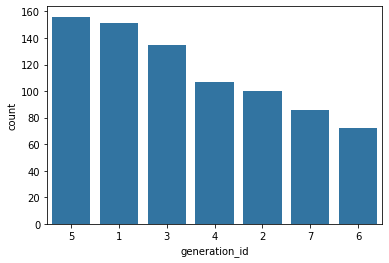

In [3]:
# YOUR CODE HERE
gen_counts= pokemon['generation_id'].value_counts()

gen_order = gen_counts.index

#selecting a color for the bars
base_color = sb.color_palette()[0]

sb.countplot(data=pokemon, x= 'generation_id', color=base_color, order= gen_order);




### Expected Output: TO DO Task 1

Once you've created your chart, run the cell below to check the output from our solution. **Your visualization does not need to be exactly the same as ours, but it should be able to come up with the same conclusions.**

### **TO DO Task 2** 
1. Each Pokémon species has either `type_1`, `type_2` or both `types` that play a part in its offensive and defensive capabilities. The code below creates a new dataframe `pkmn_types` that club the rows of both `type_1` and `type_2`, so that the resulting dataframe has **new** column, `type_level`. 

**Display, how frequent is each type?**



The function below will do the following in the pokemon dataframe *out of place*:
1. Select the 'id', and 'species' columns from pokemon. 
2. Remove the 'type_1', 'type_2' columns from pokemon
3. Add a new column 'type_level' that can have a value either 'type_1' or 'type_2'
4. Add another column 'type' that will contain the actual value contained in the 'type_1', 'type_2' columns. For example, the first row in the pokemon dataframe having `id=1`	and `species=bulbasaur` will now occur twice in the resulting dataframe after the `melt()` operation. The first occurrence will have `type=grass`, whereas, the second occurrence will have `type=poison`.

In [4]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [6]:
pkmn_types['type_level'].value_counts()

type_1    807
type_2    405
Name: type_level, dtype: int64

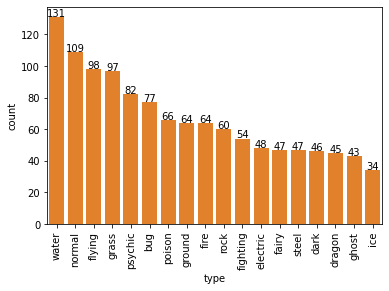

In [7]:
# YOUR CODE HERE
#selecting a color for the bars
colour = sb.color_palette()[1]

counts = pkmn_types['type'].value_counts()

#plotting the bars
sb.countplot(data=pkmn_types, x='type', color=colour, order=counts.index);

plt.xticks(rotation=90)

for i in range (counts.shape[0]):
    count = counts[i]

    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(i, count+0.5, count, ha = 'center', va='baseline')

2. Your task is to use this dataframe to create a _relative frequency_ plot of the proportion of Pokémon with each type, _sorted_ from most frequent to least. **Hint**: The sum across bars should be greater than 100%, since many Pokémon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

807
131
0.1623296158612144
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16]


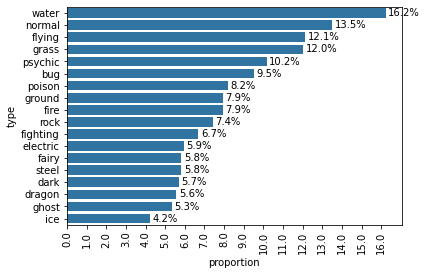

In [8]:
# YOUR CODE HERE
#getting the total number of pokemons
n_pokemon = pokemon.shape[0]
#n_pokemon = pkmn_types['type'].value_counts().sum()
#getting the size of the longest bar
max_freq = counts[0]

#computing the proportion of the highest bar
max_prop = max_freq/n_pokemon

print(n_pokemon,max_freq,max_prop, sep='\n')

#Create an array of evenly spaced proportioned values
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.01)

print(tick_props)

#Create a list of String values that can be used as tick labels.
tick_names = ['{:0.1f}'.format(v*100) for v in tick_props]
tick_names

#plot the bar chart
sb.countplot(data=pkmn_types, y='type', color=base_color, order=counts.index);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names,rotation=90)
plt.xlabel('proportion');

xiu=0
for i in range (counts.shape[0]):
    
    count = counts[i]
    
     # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    
    xiu += 100*count/n_pokemon
    # Print the string value on the bar.
    plt.text(count+1, i, pct_string, va='center')


5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64


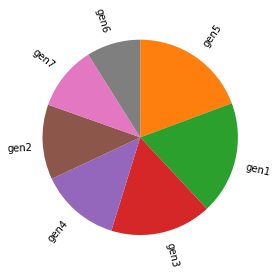

In [12]:
#
print(gen_counts)
plt.pie(gen_counts, labels=['gen5', 'gen1', 'gen3', 'gen4', 'gen2', 'gen7', 'gen6'], startangle=90, colors=sb.color_palette()[1:8], rotatelabels=True, counterclock=False);

plt.axis('square');

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64


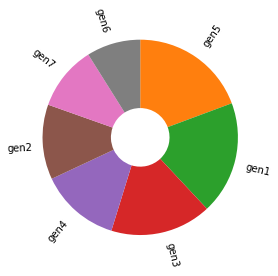

In [16]:
#
print(gen_counts)
plt.pie(gen_counts, labels=['gen5', 'gen1', 'gen3', 'gen4', 'gen2', 'gen7', 'gen6'], startangle=90, wedgeprops = {'width' : 0.7}, colors=sb.color_palette()[1:8], rotatelabels=True, counterclock=False);

plt.axis('square');

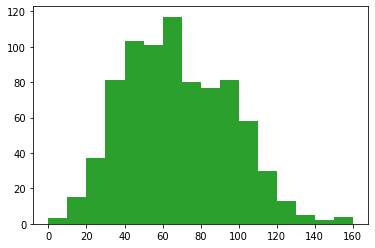

In [39]:
#plotting a histogram using matplotlib
bins = np.arange(0,pokemon['speed'].max()+10,10)
plt.hist(data = pokemon, x = 'speed', bins= bins, color=sb.color_palette()[2]);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


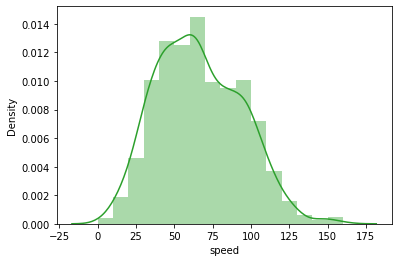

In [54]:
#plotting a histogram using seaborn
bins = np.arange(0,pokemon['speed'].max()+10,10)
sb.distplot(pokemon['speed'],bins=bins, kde=True, color=sb.color_palette()[2]);

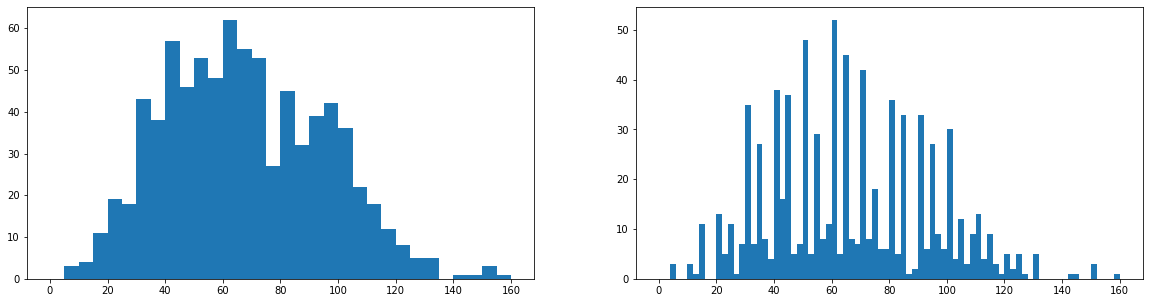

In [70]:
#plotting two histograms side by side
plt.figure(figsize=[20,5])

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1,2,1)
bin=np.arange(0,pokemon['speed'].max()+5,5)
plt.hist(data=pokemon, x='speed', bins=bin);

# histogram on right, example of too-small bin size
# 1 row, 2 cols, subplot 2
plt.subplot(1, 2, 2)
bi=np.arange(0,pokemon['speed'].max()+2,2)
plt.hist(data=pokemon, x='speed', bins=bi);